In [ ]:
import pandas as pd


file_path = '/content/Air_Quality.csv'
air_quality_df = pd.read_csv(file_path)

air_quality_df.head()
#borrowed this from previous assignments

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


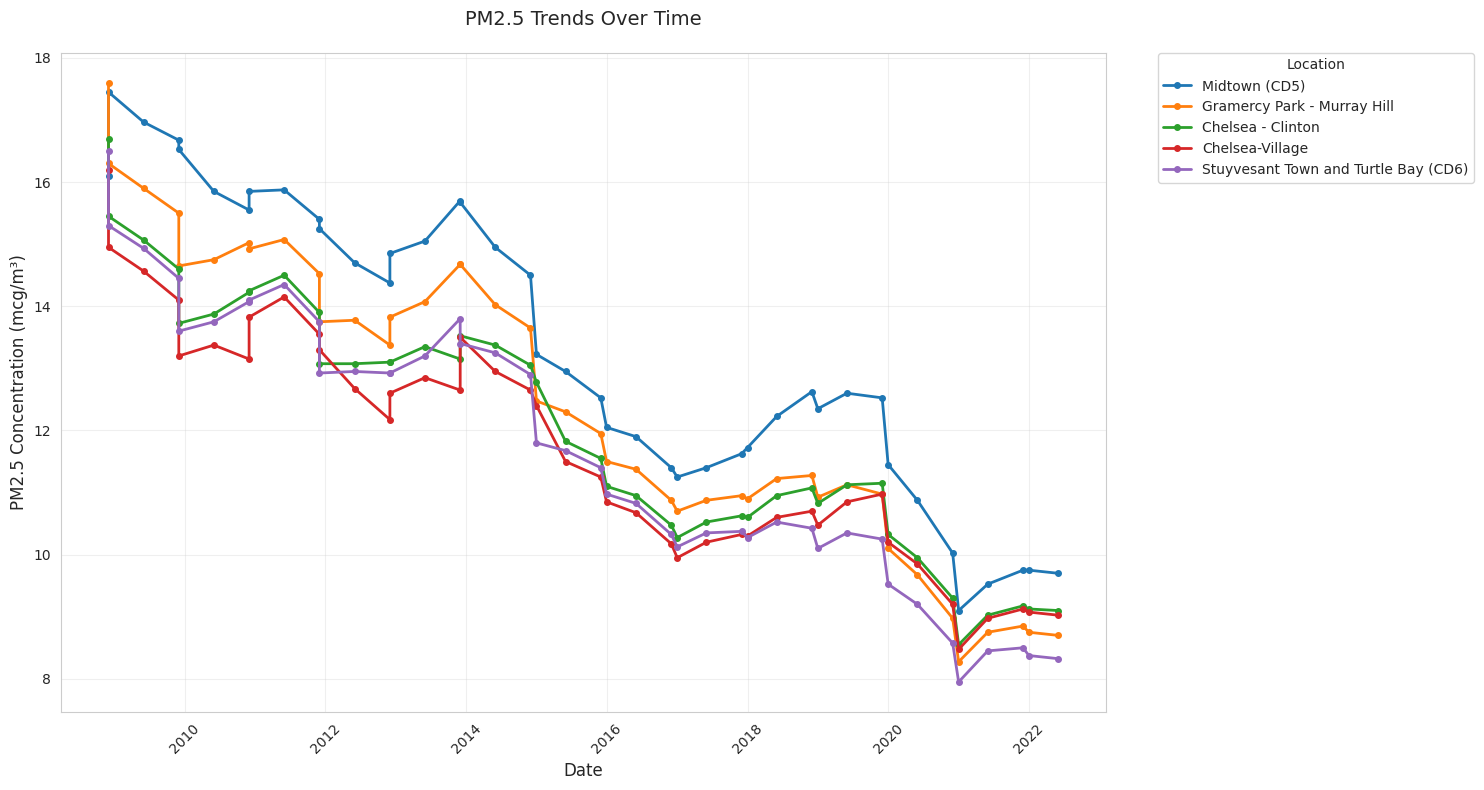


Summary Statistics for PM2.5:

Midtown (CD5):
Average: 13.06
Max: 18.80
Min: 8.70

Gramercy Park - Murray Hill:
Average: 12.10
Max: 17.60
Min: 7.90

Chelsea - Clinton:
Average: 11.77
Max: 16.70
Min: 8.30

Chelsea-Village:
Average: 11.45
Max: 16.20
Min: 8.20

Stuyvesant Town and Turtle Bay (CD6):
Average: 11.42
Max: 16.50
Min: 7.50


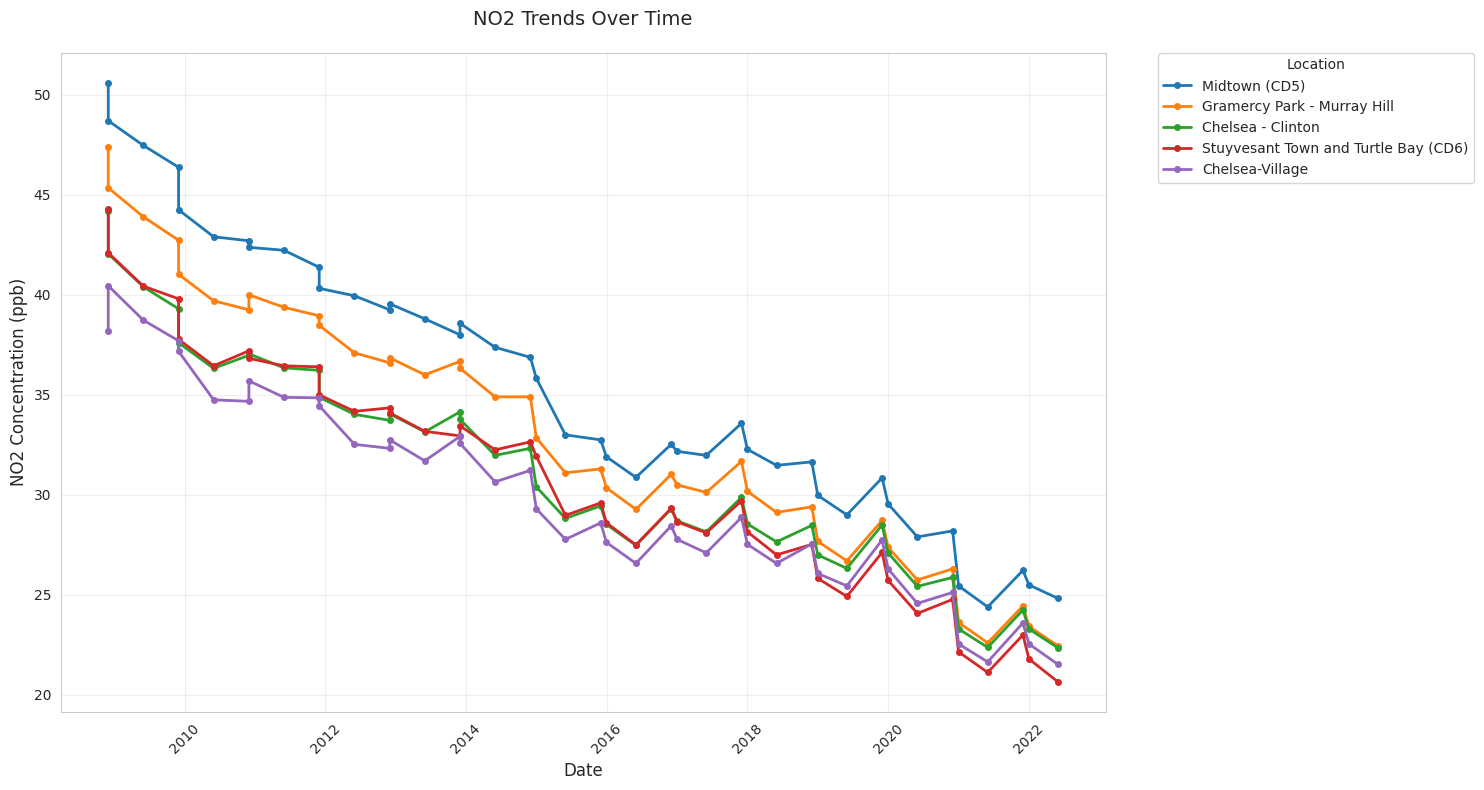


Summary Statistics for NO2:

Midtown (CD5):
Average: 34.58
Max: 50.60
Min: 21.90

Gramercy Park - Murray Hill:
Average: 32.27
Max: 47.40
Min: 19.60

Chelsea - Clinton:
Average: 30.43
Max: 44.20
Min: 19.30

Stuyvesant Town and Turtle Bay (CD6):
Average: 30.04
Max: 44.30
Min: 17.50

Chelsea-Village:
Average: 29.33
Max: 42.70
Min: 18.30


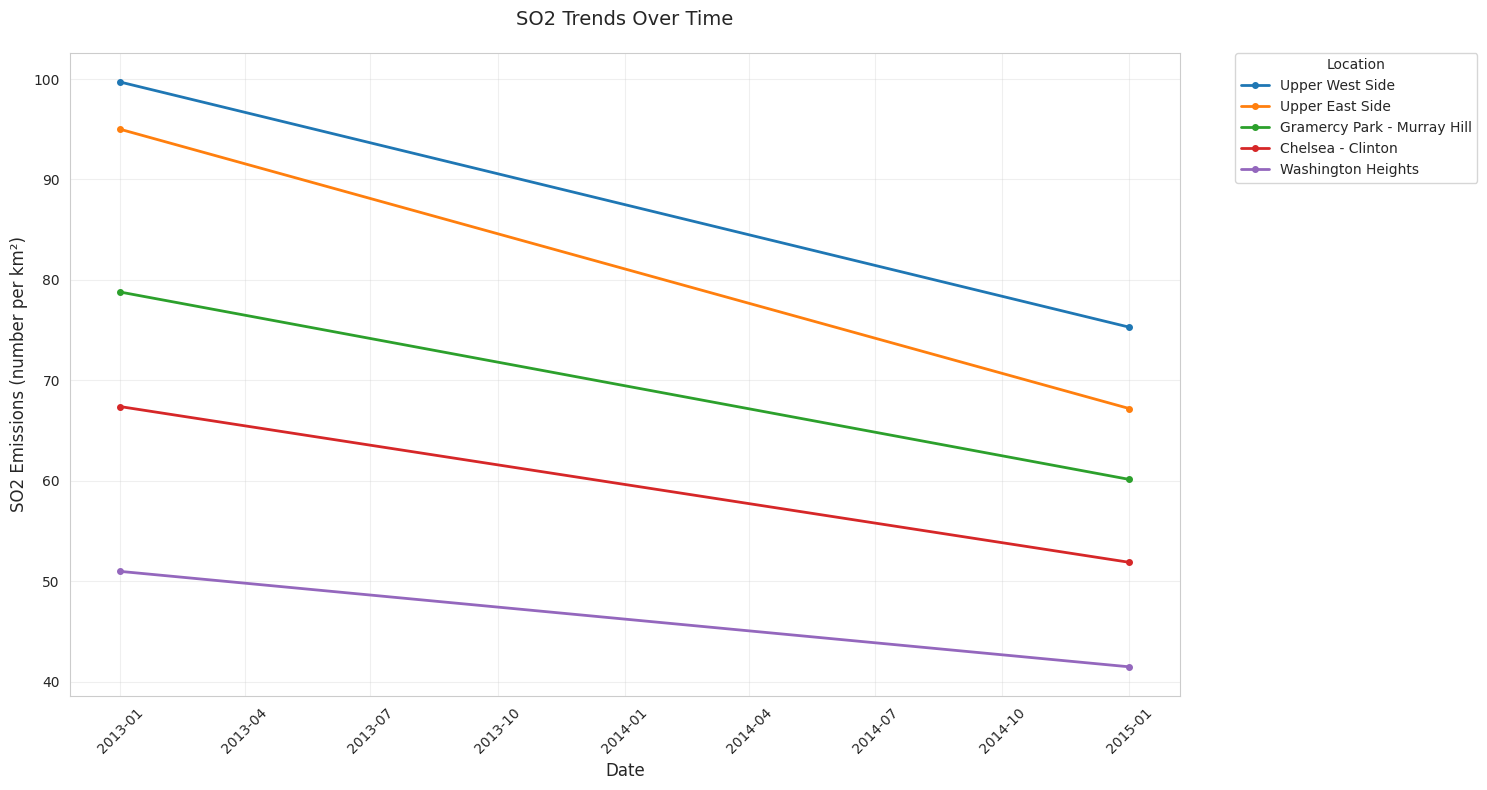


Summary Statistics for SO2:

Upper West Side:
Average: 75.30
Max: 99.70
Min: 50.90

Upper East Side:
Average: 67.20
Max: 95.00
Min: 39.40

Gramercy Park - Murray Hill:
Average: 60.15
Max: 78.80
Min: 41.50

Chelsea - Clinton:
Average: 51.90
Max: 67.40
Min: 36.40

Washington Heights:
Average: 41.50
Max: 51.00
Min: 32.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = air_quality_df

data['Start_Date'] = pd.to_datetime(data['Start_Date'], format='%m/%d/%Y', errors='coerce') # Prevent errors

# Time period processing
def extract_year_from_period(row):
    if pd.isna(row['Start_Date']):
        if isinstance(row['Time Period'], str):
            if 'Summer' in row['Time Period']:
                return pd.to_datetime(f"06/01/{row['Time Period'].split()[-1]}")
            elif 'Winter' in row['Time Period']:
                year = row['Time Period'].split()[-1].split('-')[0]
                return pd.to_datetime(f"12/01/{year}")
            elif 'Annual Average' in row['Time Period']:
                return pd.to_datetime(f"12/31/{row['Time Period'].split()[-1]}")
    return row['Start_Date']

data['Date'] = data.apply(extract_year_from_period, axis=1)

# Pollutant type separation
pm25_data = data[data['Indicator ID'] == 365].copy()  # PM2.5 data
no2_data = data[data['Indicator ID'] == 375].copy()   # NO2 data
so2_data = data[data['Indicator ID'] == 640].copy()   # SO2 data

# Separate visualizations for each pollutant
def plot_pollutant_trends(df, pollutant_name, ylabel):

    # top 5 location in this intial stage, displaying all of the location will not work
    top_locations = df.groupby('Geo Place Name')['Data Value'].mean()\
                     .sort_values(ascending=False).head(5).index

    plt.figure(figsize=(15, 8))

    for place in top_locations:
        place_data = df[df['Geo Place Name'] == place].sort_values('Date')
        # Smoother trends, consulted LLM to make the graph more visually accessable
        place_data['Smoothed Value'] = place_data['Data Value'].rolling(window=4, min_periods=1).mean()
        plt.plot(place_data['Date'],
                place_data['Smoothed Value'],
                marker='o',
                markersize=4,
                linewidth=2,
                label=place)

    plt.title(f'{pollutant_name} Trends Over Time',
              fontsize=14, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title='Location',
              bbox_to_anchor=(1.05, 1),
              loc='upper left',
              borderaxespad=0.)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # summary statistics
    print(f"\nSummary Statistics for {pollutant_name}:")
    for place in top_locations:
        place_data = df[df['Geo Place Name'] == place]
        print(f"\n{place}:")
        print(f"Average: {place_data['Data Value'].mean():.2f}")
        print(f"Max: {place_data['Data Value'].max():.2f}")
        print(f"Min: {place_data['Data Value'].min():.2f}")

plot_pollutant_trends(pm25_data, 'PM2.5', 'PM2.5 Concentration (mcg/m³)')
plot_pollutant_trends(no2_data, 'NO2', 'NO2 Concentration (ppb)')
plot_pollutant_trends(so2_data, 'SO2', 'SO2 Emissions (number per km²)')



<ipython-input-9-1dad7b0ffdd6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values,


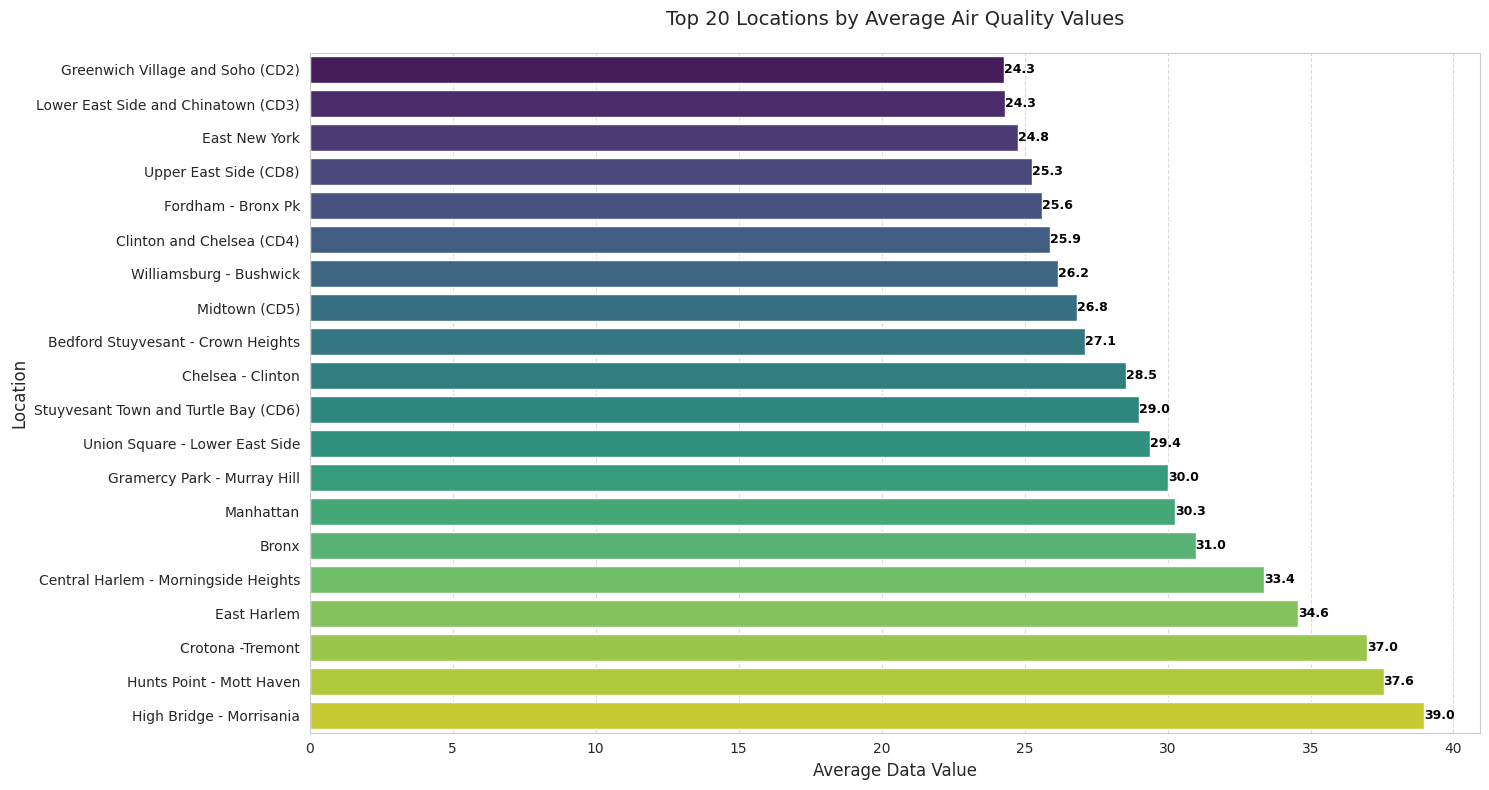


Top 20 Locations and their Average Values:
Greenwich Village and Soho (CD2): 24.27
Lower East Side and Chinatown (CD3): 24.32
East New York: 24.77
Upper East Side (CD8): 25.25
Fordham - Bronx Pk: 25.60
Clinton and Chelsea (CD4): 25.89
Williamsburg - Bushwick: 26.16
Midtown (CD5): 26.82
Bedford Stuyvesant - Crown Heights: 27.13
Chelsea - Clinton: 28.54
Stuyvesant Town and Turtle Bay (CD6): 29.01
Union Square - Lower East Side: 29.38
Gramercy Park - Murray Hill: 30.01
Manhattan: 30.25
Bronx: 30.98
Central Harlem - Morningside Heights: 33.37
East Harlem: 34.57
Crotona -Tremont: 36.99
Hunts Point - Mott Haven: 37.55
High Bridge - Morrisania: 38.98


In [ ]:
# Group by Geo Place Name and calculate the average of Data Value
geo_comparison = data.groupby('Geo Place Name')['Data Value'].mean().sort_values()

# Get top 20 locations    5 --> 20
top_locations = geo_comparison.tail(20)

plt.figure(figsize=(15, 8))

# using a bar plot
sns.barplot(x=top_locations.values,
            y=top_locations.index,
            palette='viridis',
            orient='h')

# Appending labels
plt.title('Top 20 Locations by Average Air Quality Values',
          fontsize=14,
          pad=20)
plt.xlabel('Average Data Value', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(top_locations.values):
    plt.text(v, i, f'{v:.1f}',
             va='center',
             fontsize=9,
             color='black',
             fontweight='bold')

# for visualization
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


print("\nTop 20 Locations and their Average Values:")
for loc, val in top_locations.items():
    print(f"{loc}: {val:.2f}")

Analysis: By looking at the dataset, I noticed that Harlam and Bronx are among the neighborhoods with the highest pollution. I am starting to suspect that the population that lives in those area might have a bigger impact when it comes to how much pollution is being produced. We need to find out how much pollution is being prodiced, how much are being reduced, and prehaps the amount of fundings being put into the effort?

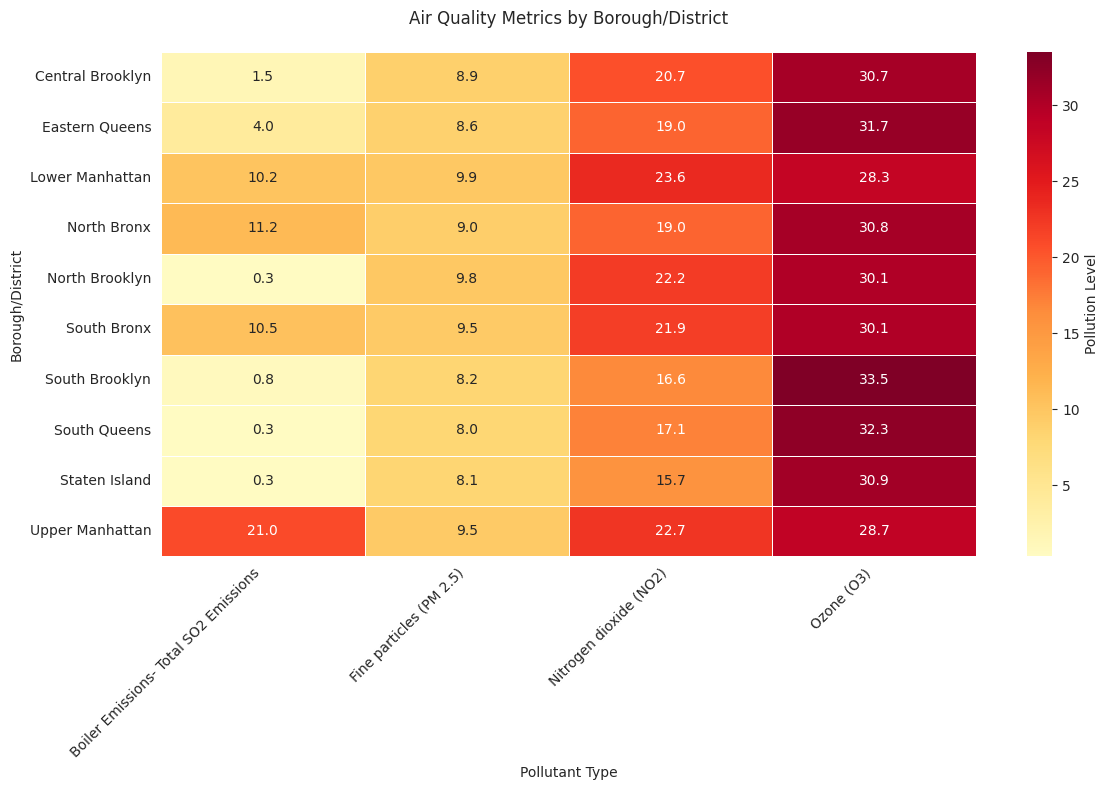


Average Pollution Levels by Borough/District:
Borough_District
Upper Manhattan     20.45
Lower Manhattan     18.01
South Bronx         18.01
North Bronx         17.50
Eastern Queens      15.86
North Brooklyn      15.60
Central Brooklyn    15.42
South Brooklyn      14.77
South Queens        14.43
Staten Island       13.77
dtype: float64


In [ ]:
# Group neighborhoods into larger areas (boroughs and major districts), generialization
data['Borough_District'] = data['Geo Place Name'].map({
    # Manhattan
    'Downtown - Heights - Slope': 'Lower Manhattan',
    'East Village - Lower East Side': 'Lower Manhattan',
    'Greenwich Village and Soho': 'Lower Manhattan',
    'Union Square - Lower East Side': 'Lower Manhattan',
    'Central Harlem - Morningside Heights': 'Upper Manhattan',
    'East Harlem': 'Upper Manhattan',
    'Washington Heights': 'Upper Manhattan',

    # Brooklyn
    'Bedford Stuyvesant - Crown Heights': 'Central Brooklyn',
    'East Flatbush - Flatbush': 'Central Brooklyn',
    'Williamsburg - Bushwick': 'North Brooklyn',
    'Coney Island - Sheepshead Bay': 'South Brooklyn',

    # Bronx
    'Crotona -Tremont': 'South Bronx',
    'High Bridge - Morrisania': 'South Bronx',
    'Hunts Point - Mott Haven': 'South Bronx',
    'Fordham - Bronx Pk': 'North Bronx',
    'Northeast Bronx': 'North Bronx',

    # Queens
    'Bayside and Little Neck': 'Eastern Queens',
    'Flushing - Clearview': 'Eastern Queens',
    'Queens Village': 'Eastern Queens',
    'Rockaway and Broad Channel': 'South Queens',
    'Southeast Queens': 'South Queens',

    # Staten Island
    'South Beach and Willowbrook': 'Staten Island',
    'Stapleton - St. George': 'Staten Island'
})

# Simplified pivot table
simplified_pivot = data[data['Name'].isin([
    'Fine particles (PM 2.5)',
    'Nitrogen dioxide (NO2)',
    'Ozone (O3)',
    'Boiler Emissions- Total SO2 Emissions'
])].pivot_table(
    values='Data Value',
    index='Borough_District',
    columns='Name',
    aggfunc='mean'
)

# The heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(simplified_pivot,
            annot=True,
            fmt='.1f',
            cmap='YlOrRd',
            center=simplified_pivot.mean().mean(),
            cbar_kws={'label': 'Pollution Level'},
            linewidths=0.5)

plt.title('Air Quality Metrics by Borough/District', pad=20)
plt.xlabel('Pollutant Type')
plt.ylabel('Borough/District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\nAverage Pollution Levels by Borough/District:")
print(simplified_pivot.mean(axis=1).sort_values(ascending=False).round(2))